# Data Wrangling and Exploratory Data Analysis of Walmart Dataset

In this notebook, I'm going to clean the training dataset for model fitting, and, as I think it makes more sense to make changes to the dataset while you're learning more about it, there's going to be some EDA involved in this, too. 

In [80]:
#Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

First, let's take a look at our training data, the types of information contained, and the distribution of the numerical variables.

In [81]:
df_train = pd.read_csv(r'C:\Users\songs\Desktop\Springboard Files\Capstone 2\data\Raw\train.csv')
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,26,92,2011-08-26,87235.57,False,61.10,3.796,NaN,NaN,NaN,NaN,NaN,136.213613,7.767,A,152513
1,34,22,2011-03-25,5945.97,False,53.11,3.480,NaN,NaN,NaN,NaN,NaN,128.616064,10.398,A,158114
2,21,28,2010-12-03,1219.89,False,50.43,2.708,NaN,NaN,NaN,NaN,NaN,211.265543,8.163,B,140167
3,8,9,2010-09-17,11972.71,False,75.32,2.582,NaN,NaN,NaN,NaN,NaN,214.878556,6.315,A,155078
4,19,55,2012-05-18,8271.82,False,58.81,4.029,12613.98,NaN,11.5,1705.28,3600.79,138.106581,8.150,A,203819


In [82]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282451 entries, 0 to 282450
Data columns (total 16 columns):
Store           282451 non-null int64
Dept            282451 non-null int64
Date            282451 non-null object
Weekly_Sales    282451 non-null float64
IsHoliday       282451 non-null bool
Temperature     282451 non-null float64
Fuel_Price      282451 non-null float64
MarkDown1       100520 non-null float64
MarkDown2       74232 non-null float64
MarkDown3       91521 non-null float64
MarkDown4       90031 non-null float64
MarkDown5       101029 non-null float64
CPI             282451 non-null float64
Unemployment    282451 non-null float64
Type            282451 non-null object
Size            282451 non-null int64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 32.6+ MB


In [83]:
df_train.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,282451.000000,282451.000000,282451.000000,282451.000000,282451.000000,100520.000000,74232.000000,91521.000000,90031.000000,101029.000000,282451.000000,282451.000000,282451.000000
mean,22.193166,44.286138,15983.429692,60.113640,3.360300,7246.077559,3318.408122,1417.397841,3379.591745,4639.476021,171.207802,7.968098,136730.073220
std,12.782138,30.503641,22661.092494,18.446485,0.458602,8254.606267,9485.575898,9547.858949,6269.428446,6060.459590,39.160808,1.868070,61002.319363
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.330000,46.780000,2.932000,2241.190000,40.960000,5.060000,508.100000,1877.810000,132.022667,6.891000,93638.000000
50%,22.000000,38.000000,7616.550000,62.150000,3.452000,5363.520000,191.820000,24.340000,1482.030000,3364.410000,182.350989,7.866000,140167.000000
75%,33.000000,74.000000,20245.745000,74.290000,3.737000,9235.590000,1919.790000,103.130000,3607.570000,5563.800000,212.464799,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


At first glance, there are two steps that could be undertaken:
* We could change the Date column to have a datetime format.
* We could fill in the null values in the MarkDown columns with 0.
* Change the type of the Type column to be categorical

In [84]:
#Defining functions
def convertToDatetime(df):
    """Convert date column to datetime"""
    df['Date'] = df['Date'].astype('datetime64[ns]')
    return df

def fillNans(df):
    df = df.fillna(0)
    return df

def convertToCategorical(df):
    df = pd.get_dummies(df)
    return df

In [85]:
#Applying the functions needed
df_datetime = convertToDatetime(df_train)
df_nanfilled = fillNans(df_datetime)
df_categorical = convertToCategorical(df_nanfilled)
df_train_1 = df_categorical

#look at the results
df_train_1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Type_A,Type_B,Type_C
0,26,92,2011-08-26,87235.57,False,61.10,3.796,0.00,0.0,0.0,0.00,0.00,136.213613,7.767,152513,1,0,0
1,34,22,2011-03-25,5945.97,False,53.11,3.480,0.00,0.0,0.0,0.00,0.00,128.616064,10.398,158114,1,0,0
2,21,28,2010-12-03,1219.89,False,50.43,2.708,0.00,0.0,0.0,0.00,0.00,211.265543,8.163,140167,0,1,0
3,8,9,2010-09-17,11972.71,False,75.32,2.582,0.00,0.0,0.0,0.00,0.00,214.878556,6.315,155078,1,0,0
4,19,55,2012-05-18,8271.82,False,58.81,4.029,12613.98,0.0,11.5,1705.28,3600.79,138.106581,8.150,203819,1,0,0


In [86]:
#Look at the types of our resulting dataframe
df_train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282451 entries, 0 to 282450
Data columns (total 18 columns):
Store           282451 non-null int64
Dept            282451 non-null int64
Date            282451 non-null datetime64[ns]
Weekly_Sales    282451 non-null float64
IsHoliday       282451 non-null bool
Temperature     282451 non-null float64
Fuel_Price      282451 non-null float64
MarkDown1       282451 non-null float64
MarkDown2       282451 non-null float64
MarkDown3       282451 non-null float64
MarkDown4       282451 non-null float64
MarkDown5       282451 non-null float64
CPI             282451 non-null float64
Unemployment    282451 non-null float64
Size            282451 non-null int64
Type_A          282451 non-null uint8
Type_B          282451 non-null uint8
Type_C          282451 non-null uint8
dtypes: bool(1), datetime64[ns](1), float64(10), int64(3), uint8(3)
memory usage: 31.2 MB


Now that all the columns are filled, we could look at each value's distribution to search for any outliers that need to be examined.

#### Weekly_Sales

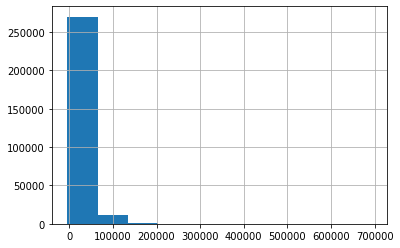

In [87]:
df_train_1['Weekly_Sales'].hist()
plt.show()

It appears that the vast majority of the weekly revenues are below $100000, and outliers above are impacting the x-axis and preventing us from getting a clearer picture. Let's see what the data looks like without those outliers:

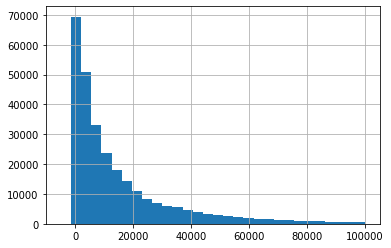

In [88]:
df_train_1[df_train_1['Weekly_Sales'] < 100000]['Weekly_Sales'].hist(bins=30)
plt.show()

Without the outliers, it seems that the data is heavily skewed to the right, following an almost inverse exponential pattern, with most of the data being on the left hand of the scale. This is supported by the relationship between the mean and the median value.

Maybe we can make the sales data more centered by finding the log, after adjusting for the negative values by adding one above the negative of the minimum.

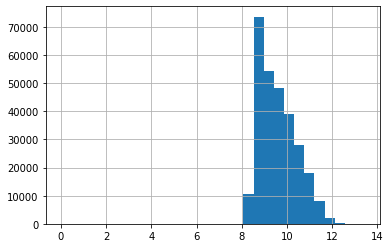

In [89]:
df_train_1['log_revenue'] = np.log(df_train_1['Weekly_Sales'] + 4989.94)
df_train_1.log_revenue.hist(bins=30)

In [90]:
df_train_1.log_revenue.describe()

count    282451.000000
mean          9.571114
std           0.822341
min           0.000000
25%           8.863513
50%           9.441967
75%          10.136014
max          13.456102
Name: log_revenue, dtype: float64

While the resulting histogram is not exactly normal, it is less skewed compared to the almost exponential curve of its un-logged counterpart and the mean and median are closer to each other. Still, we have one outlier which corresponds with the minimum of the original revenue that may or may not need to be removed in the future.

#### IsHoliday

First of all, let's see how many of the included weeks are holidays.

In [91]:
df_train_1['IsHoliday'].sum()

19819

So 19819 of the included weeks are holidays. Next I looked at the unique values included to see if they are holidays, and if there are any holidays missing. Below are the holidays Walmart gave:
    
    Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
    Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
    Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
    Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

Before beginning anything I looked for the earliest and latest week included in the data to see what are the values that should be included.

In [92]:
print('The range of dates included go from ' + str(df_train_1['Date'].min()) + ' to ' + str(df_train_1['Date'].max()))

The range of dates included go from 2010-02-05 00:00:00 to 2012-10-26 00:00:00


Thus, the dates that should be there are:
* 2010-02-12
* 2010-09-10
* 2010-11-26
* 2010-12-31
* 2011-02-11
* 2011-09-09
* 2011-11-25
* 2011-12-30
* 2012-02-10
* 2012-09-07

In [93]:
df_train_1[df_train_1['IsHoliday'] == True]['Date'].unique()

array(['2011-02-11T00:00:00.000000000', '2010-11-26T00:00:00.000000000',
       '2010-02-12T00:00:00.000000000', '2011-09-09T00:00:00.000000000',
       '2012-02-10T00:00:00.000000000', '2010-12-31T00:00:00.000000000',
       '2010-09-10T00:00:00.000000000', '2011-12-30T00:00:00.000000000',
       '2012-09-07T00:00:00.000000000', '2011-11-25T00:00:00.000000000'],
      dtype='datetime64[ns]')

There's 10 dates that should be included, and they are included in the IsHoliday column. Next, I made a violin plot for the weekly sales for both holiday and non-holiday weeks.

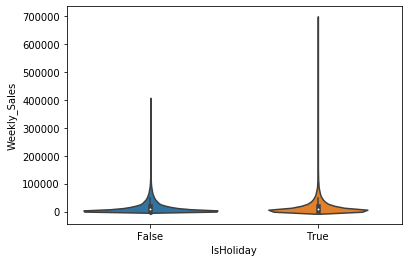

In [94]:
sns.violinplot(x="IsHoliday", y="Weekly_Sales", data=df_train_1)

While the largest number of sales is more for holiday weeks than it is for non-holiday weeks, there are outliers in both that obscure the general distribution. Now we'll replace the weekly revenues with their logged values, and see if a clearer pattern emerges.

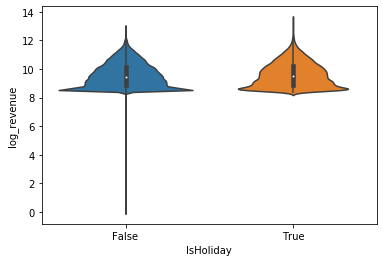

In [95]:
sns.violinplot(x="IsHoliday", y="log_revenue", data=df_train_1)

Looks like one outlier in IsHoliday = False is preventing us from getting a clearer look at the difference in distribution. I'll remove that point and remake the violin plot. And since there is only one original weekly revenue that's negative, I don't plan to keep it in the data, and the rest of the analysis will be done without it.

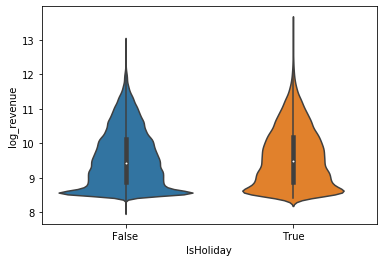

In [96]:
df_no_negative = df_train_1.drop(df_train_1.loc[df_train_1['log_revenue'] == 0].index[0])
sns.violinplot(x="IsHoliday", y="log_revenue", data=df_no_negative)

Now we can more clearly visualize the difference in distributions. Generally, it seems that Holiday weeks see greater weekly sales compared to non-holiday weeks.

#### Temperature

First I looked at the distribution of the temperatures themselves. For all my numerical columns, I'm going to be making a histogram of the column itself and then a scatter plot to visualize its relationship with the log of the weekly sales on the y-axis to see if there is any relationship between them. Thus, I think it's going to be helpful to write a function, plotting() that takes a column and a dataset, which has a default value of df_no_negative.

In [97]:
def plotting(x, data=df_no_negative):
    #Setting figure size
    plt.figure(figsize=(15, 6))
    
    #Plotting a histogramn
    plt.subplot(1,2,1)
    f = data[x].hist()
    
    #Plotting a scatterplot to examine relationship
    plt.subplot(1,2,2)
    plt.scatter(x=data[x], y=data['log_revenue'])
    
    #fitting a best fit line
    plt.plot(np.unique(data[x]), np.poly1d(np.polyfit(data[x], data['log_revenue'], 1))(np.unique(data[x])),color='r')
    
    #Showing the result
    plt.tight_layout()
    plt.show()

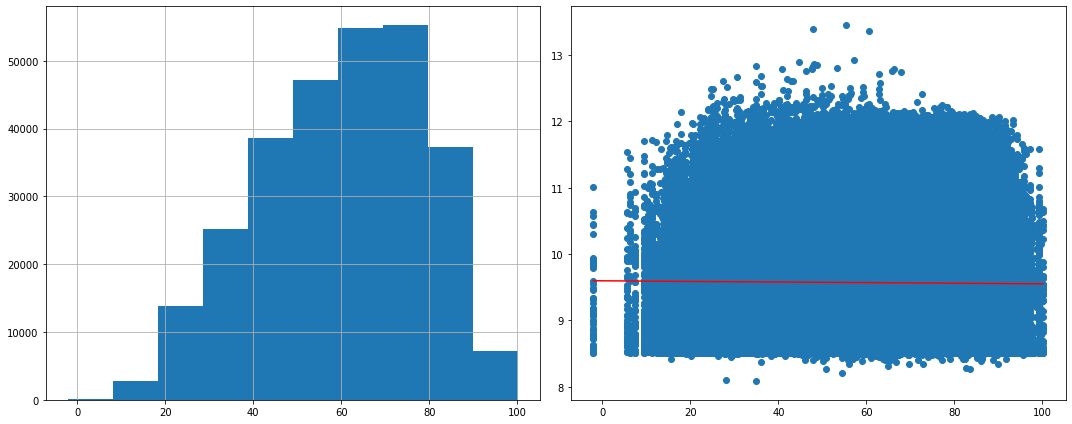

In [98]:
plotting('Temperature',data=df_no_negative)

Generally, the distribution skews to the left. According to the summary above, the minimum temperature is -2.06F (-18.92C), and the maximum temperature is 100.14 (37.88C). Both of these temperatures are reasonable, so there's no reason to not keep them.

According to the scatterplot above, there seems to be no relationship between the log of weekly revenue and the temperature. I replotted the scatterplot using the original weekly sales, in a larger graph, to better visualize whether a relationship exists between the Temperature and the weekly sales.

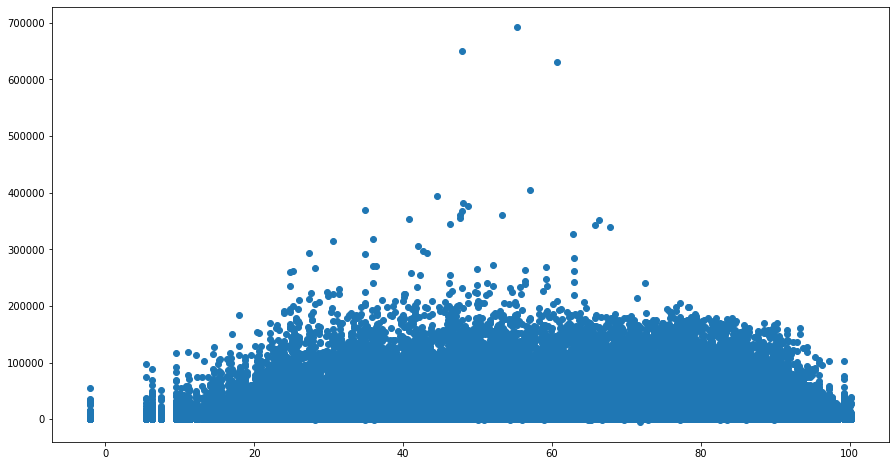

In [99]:
plt.figure(figsize=(15,8))
plt.scatter(df_train_1['Temperature'], df_train_1['Weekly_Sales'])

Generally, the above graph seems to suggest a slight positive correlation between temperature and weekly sales up to around 95F, after which the sales decrease to around the same as extremely low temperatures. Perhaps people are more likely to leave the house if the weather is nice, and are more likely to make purchases as a result.

There are some outliers above $300,000 that's different from the rest. Below, I take a closer look at them. 

In [100]:
df_train_1[df_train_1['Weekly_Sales']>300000]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Type_A,Type_B,Type_C,log_revenue
29352,23,72,2010-11-26,369830.98,True,34.95,3.070,0.00,0.00,0.00,0.00,0.00,132.836933,5.287,114533,0,1,0,12.834204
41292,39,72,2010-11-26,339700.62,True,67.75,2.735,0.00,0.00,0.00,0.00,0.00,210.515277,8.476,184109,1,0,0,12.750402
66187,18,72,2010-11-26,353008.64,True,40.81,3.070,0.00,0.00,0.00,0.00,0.00,132.836933,9.331,120653,0,1,0,12.788284
83588,10,72,2011-11-25,630999.19,True,60.68,3.760,174.72,329.00,141630.61,79.00,1009.98,129.836400,7.874,126512,0,1,0,13.362937
93294,4,72,2010-11-26,381072.11,True,48.08,2.752,0.00,0.00,0.00,0.00,0.00,126.669267,7.127,205863,1,0,0,12.863753
97641,10,72,2010-12-24,404245.03,False,57.06,3.236,0.00,0.00,0.00,0.00,0.00,126.983581,9.003,126512,0,1,0,12.922045
116197,27,72,2011-11-25,368484.19,True,47.88,3.689,164.01,27.47,73934.06,24.22,540.56,140.421786,7.906,204184,1,0,0,12.830604
121958,12,72,2010-11-26,359995.60,True,47.66,3.162,0.00,0.00,0.00,0.00,0.00,126.669267,14.313,112238,0,1,0,12.807613
140076,22,72,2011-11-25,345532.23,True,46.28,3.536,1649.31,0.00,70087.94,7.50,5266.90,140.421786,7.706,119557,0,1,0,12.767179
150574,18,72,2011-11-25,305161.38,True,41.97,3.536,748.82,46.00,71366.86,19.00,577.40,136.478800,8.471,120653,0,1,0,12.644816


It appears that all weekly sales above $300,000 are made around holiday season. Even those which were not technically on a "holiday week" as determined by Walmart happened in the week before one, and could be driven by consumers needing to make purchases earlier. Perhaps we ought to expand the IsHoliday column to include weeks before the pre-determined "holiday weeks".

#### Fuel prices

First let's use the function we just created to create the histogram and the scatter plot.

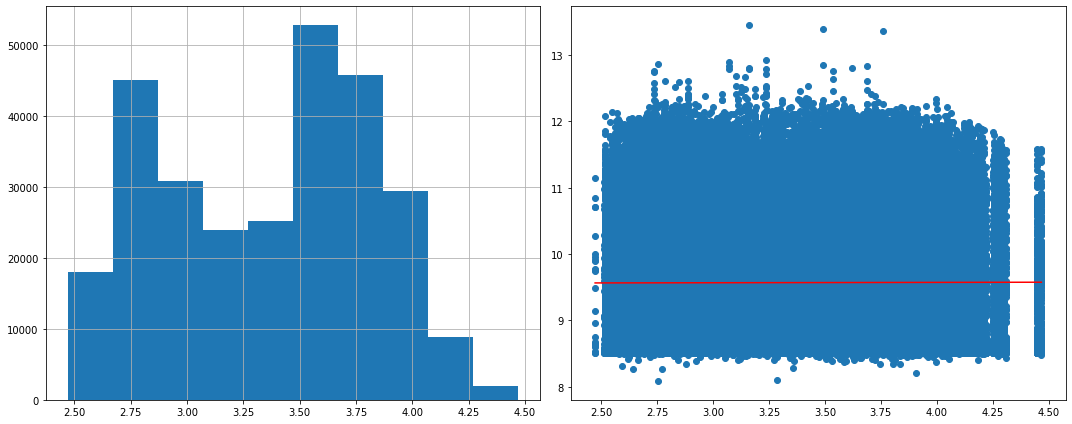

In [101]:
plotting('Fuel_Price')

Judging from the histogram, our gas prices appear to be bimodal, with one peak at 2.75 dollars and another one at 3.75 dollars. I wonder if that relates to different years.

In [102]:
df_train_1[df_train_1['Fuel_Price'] == 2.75].head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Type_A,Type_B,Type_C,log_revenue
1007,32,41,2010-04-09,2913.55,False,44.88,2.75,0.0,0.0,0.0,0.0,0.0,189.690101,8.963,203007,1,0,0,8.975060
1526,16,95,2010-04-09,19289.41,False,34.21,2.75,0.0,0.0,0.0,0.0,0.0,189.690101,6.842,57197,0,1,0,10.097381
6401,16,11,2010-04-09,7712.75,False,34.21,2.75,0.0,0.0,0.0,0.0,0.0,189.690101,6.842,57197,0,1,0,9.449569
7413,16,38,2010-04-09,51162.10,False,34.21,2.75,0.0,0.0,0.0,0.0,0.0,189.690101,6.842,57197,0,1,0,10.935818
8857,32,13,2010-04-09,28281.65,False,44.88,2.75,0.0,0.0,0.0,0.0,0.0,189.690101,8.963,203007,1,0,0,10.412459
9922,41,55,2010-04-09,10095.79,False,37.30,2.75,0.0,0.0,0.0,0.0,0.0,189.690101,7.363,196321,1,0,0,9.621505
11965,7,74,2010-04-09,7776.46,False,33.79,2.75,0.0,0.0,0.0,0.0,0.0,189.690101,8.963,70713,0,1,0,9.454572
17600,16,21,2010-04-09,3241.82,False,34.21,2.75,0.0,0.0,0.0,0.0,0.0,189.690101,6.842,57197,0,1,0,9.015755
17921,41,9,2010-04-09,26727.59,False,37.30,2.75,0.0,0.0,0.0,0.0,0.0,189.690101,7.363,196321,1,0,0,10.364625
19532,16,98,2010-04-09,-15.86,False,34.21,2.75,0.0,0.0,0.0,0.0,0.0,189.690101,6.842,57197,0,1,0,8.511996


In [103]:
df_train_1[df_train_1['Fuel_Price'] == 3.75].head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Type_A,Type_B,Type_C,log_revenue
291,7,82,2012-03-30,9222.79,False,44.99,3.75,8460.02,2.40,9.25,385.22,1666.60,197.413326,8.256,70713,0,1,0,9.561893
500,16,12,2012-03-30,2977.91,False,48.29,3.75,3404.77,0.00,5.00,188.80,1133.72,197.413326,6.162,57197,0,1,0,8.983170
907,16,1,2012-10-19,12442.68,False,40.59,3.75,1278.03,0.00,1.16,16.38,1395.48,199.148196,5.847,57197,0,1,0,9.766098
933,7,34,2012-10-19,3543.29,False,43.01,3.75,2034.63,0.00,0.50,298.55,4163.41,199.148196,7.557,70713,0,1,0,9.051723
1113,41,52,2012-03-30,2352.52,False,51.56,3.75,5694.25,9.66,7.09,1677.31,2419.34,197.413326,6.589,196321,1,0,0,8.901429
1839,41,80,2012-03-30,17299.29,False,51.56,3.75,5694.25,9.66,7.09,1677.31,2419.34,197.413326,6.589,196321,1,0,0,10.011859
2067,41,97,2012-10-19,20912.24,False,49.56,3.75,3138.86,0.00,6.17,129.04,8206.10,199.148196,6.195,196321,1,0,0,10.162082
2330,41,10,2012-03-30,14087.20,False,51.56,3.75,5694.25,9.66,7.09,1677.31,2419.34,197.413326,6.589,196321,1,0,0,9.856246
3694,41,49,2012-03-30,5202.01,False,51.56,3.75,5694.25,9.66,7.09,1677.31,2419.34,197.413326,6.589,196321,1,0,0,9.229353
3951,7,83,2012-10-19,536.50,False,43.01,3.75,2034.63,0.00,0.50,298.55,4163.41,199.148196,7.557,70713,0,1,0,8.617299


Judging from the above tables, I am correct and the 2.75 peak correlates to around 2010 while the 3.75 peak correlates to around 2012. With that out of the way, let's do what we did last time, replot the scatter plot using the original data.

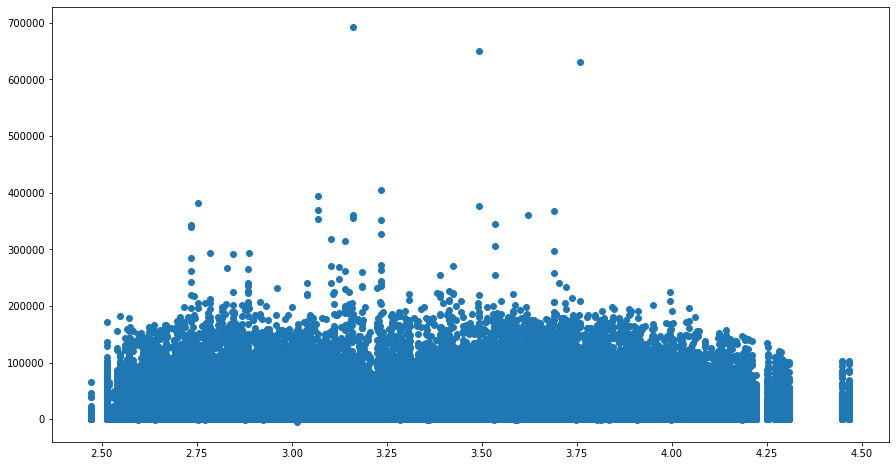

In [104]:
plt.figure(figsize=(15,8))
plt.scatter(df_train_1['Fuel_Price'], df_train_1['Weekly_Sales'])

The graph seems to suggest a slight negative correlation between the two, meaning that as gas prices go higher, stores are generating less sales. This makes sense, as 1) higher gas prices mean less money for other purchases and 2)higher gas prices also mean people are less willing to travel, and less likely to purchase things. 

This finding, however, doesn't appear to be replicated in the scatter plot with logged values,and I'd expect patterns shown in scatterplots with logged values to contribute more in the final prediction. Thus, I'm not going to look at the original revenues again for the rest of the notebook.

#### Markdowns

Before visualizing the impact of each individual markdown on the weekly sales data, I wonder if there's a difference between sales made on weeks with markdowns and weeks without. To do this, I split the data into weeks without markdowns and weeks with markdowns and compared the revenues between them using a violin plot.

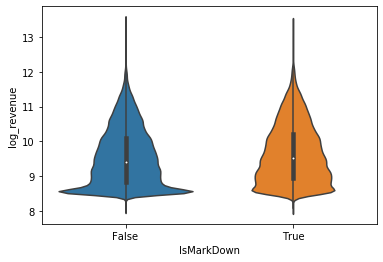

In [116]:
#To make data subsetting easier I'm going to use the .isnull() method on the uncleaned data.
df_no_negative['IsMarkDown'] = ~df_train.isnull().any(1)
sns.violinplot(x="IsMarkDown", y="log_revenue", data=df_no_negative)

So it appears that the presense markdowns don't significantly contribute to higher sales, as the highest weekly sale is in a non-markdown week, even though the average number of sales seem to be slightly higher for markdown weeks. Now let's look at the correlation between individual markdowns and 

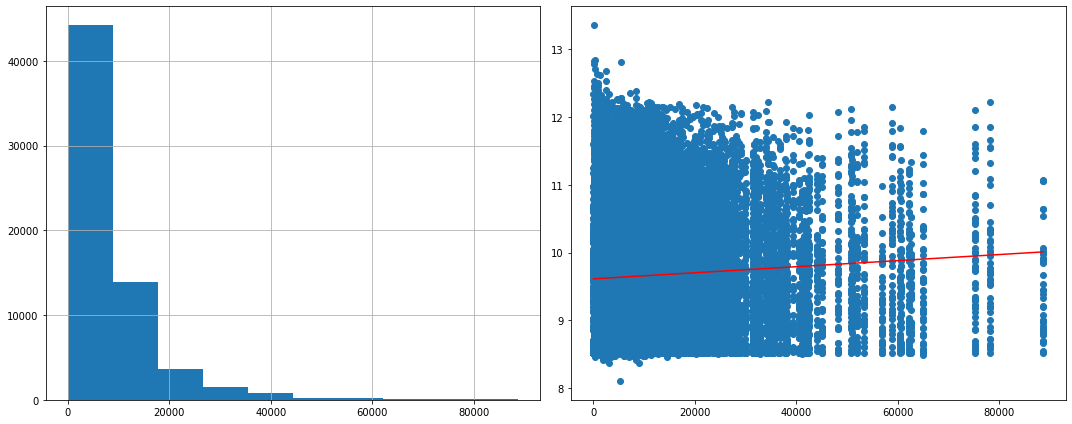

In [107]:
plotting('MarkDown1',data=df_train_1[df_train_1['IsMarkDown']])

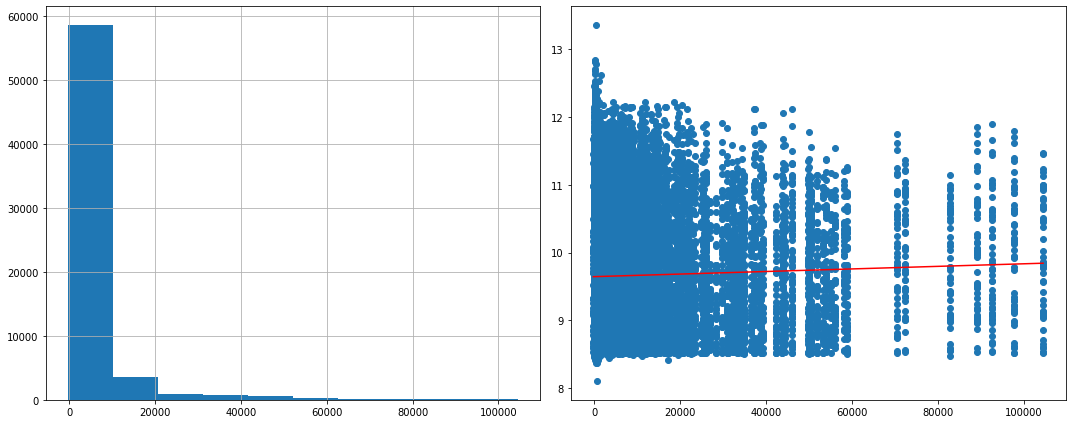

In [108]:
plotting('MarkDown2',data=df_train_1[df_train_1['IsMarkDown']])

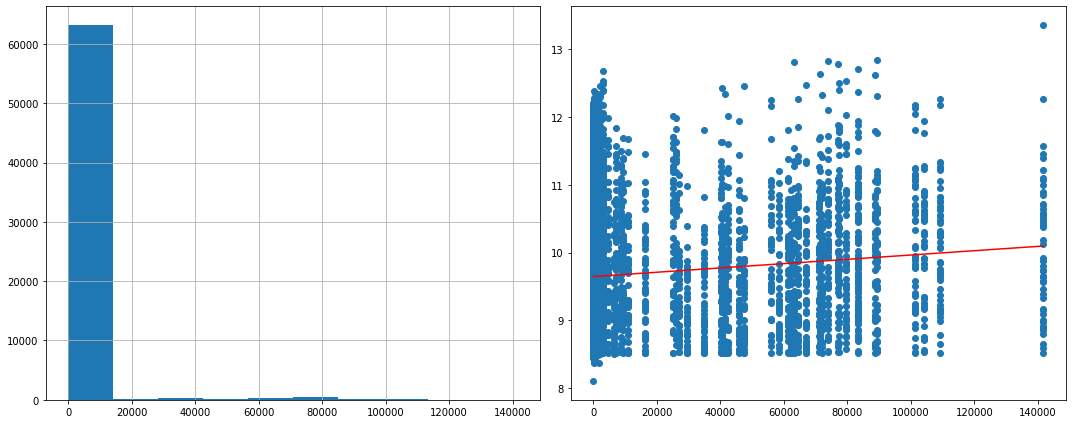

In [109]:
plotting('MarkDown3',data=df_train_1[df_train_1['IsMarkDown']])

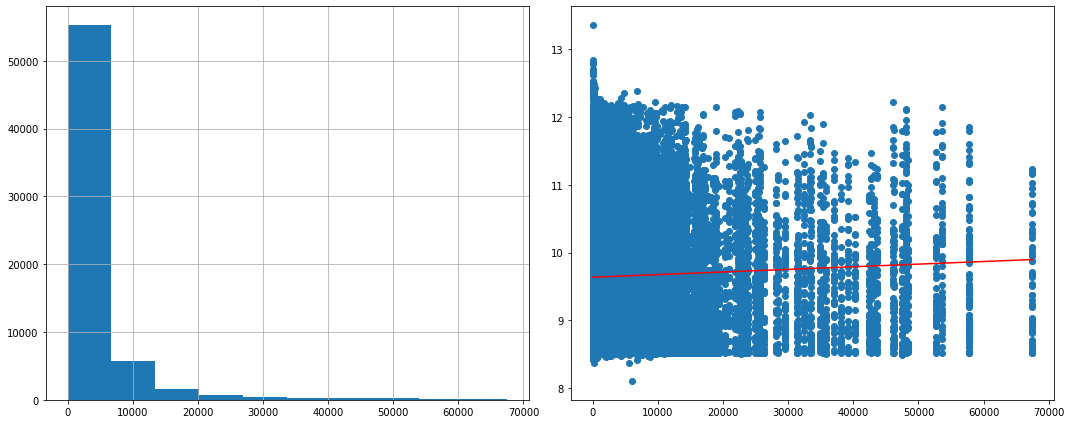

In [110]:
plotting('MarkDown4',data=df_train_1[df_train_1['IsMarkDown']])

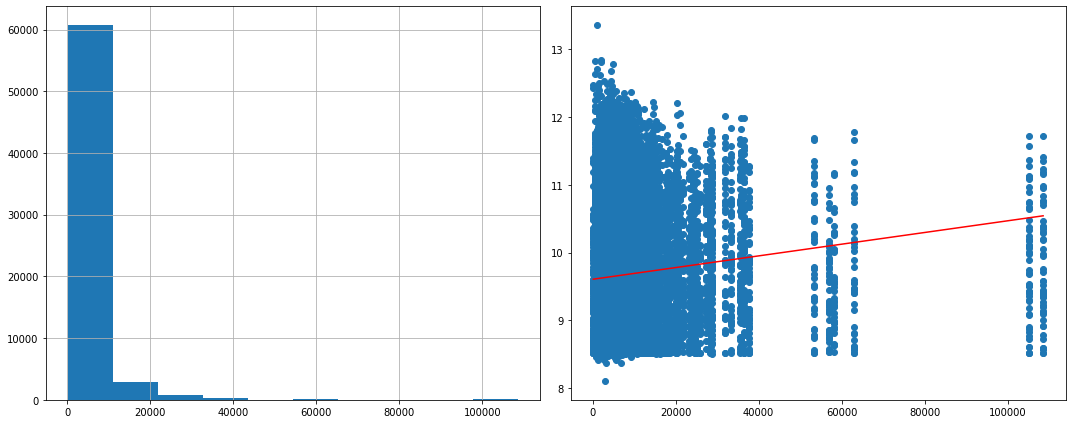

In [111]:
plotting('MarkDown5',data=df_train_1[df_train_1['IsMarkDown']])

When there are discounts, it seems that more discounts correlate with more revenue generated. This makes sense when considering what we learned from the comparison between markdown and non-markdown weeks.


#### CPI (Consumer Price Index)

The Consumer Price Index (CPI) is a measure of the average change over time in the prices paid by urban consumers for a market basket of consumer goods and services, according to the Bureau of Labor Statistics. To examine its relationship with the weekly sales, I created a histogram and scatter plot using the function defined above, with the outliers excluded to get a clearer picture.

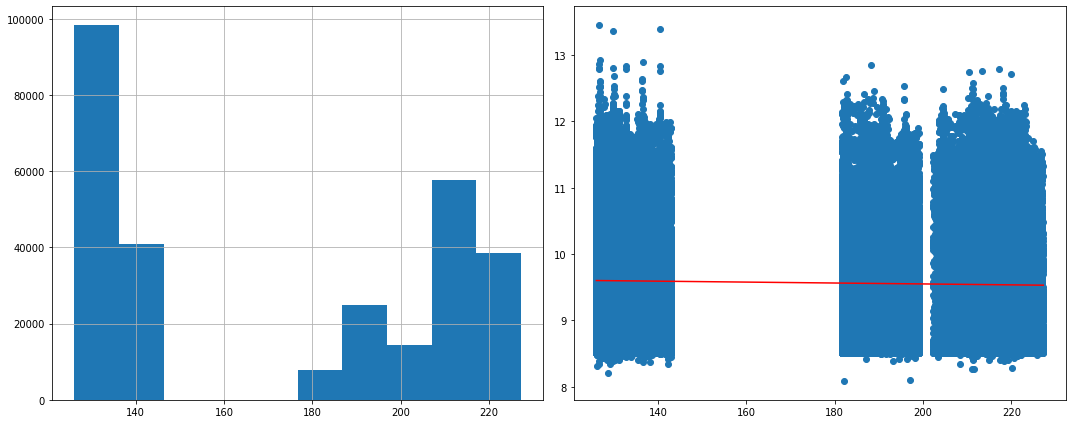

In [112]:
plotting('CPI')

The CPI included demonstrate a bimodal pattern, which I suspect have something to do with the year of the data taken. And generally, the higher the consumer price index (meaning the items are more expensive) the lower the revenue. It is not as obvious as one would expect, though, which could be contributed to the trade off between higher revenue gained per item and the less numbers of items sold.

#### Unemployment

I did what I've been doing this whole notebook with numerical variables: create a histogram and scatter plot.

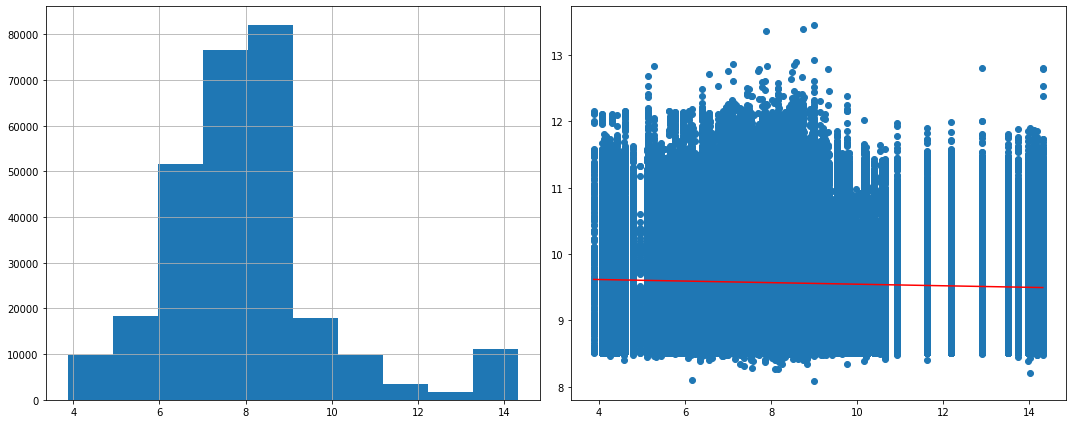

In [113]:
plotting('Unemployment')

The unemployment rate is vaguely normal. And it seems that higher unemployment rates correlate with less revenue generated, which makes intuitive sense.

#### Type

In an earlier part I noticed that type A stores tend to be bigger than type B stores, and I wonder if there is a similar pattern for type C stores, so I created a box plot.

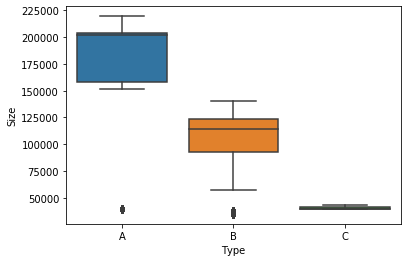

In [119]:
sns.boxplot(x='Type',y='Size',data=df_train)

Generally type A is larger than type B, which is typically larger than type C. However, outliers exist in types A and B so the stores types are not solely dependent on size. Now, let's compare the weekly revenue generated by these stores.

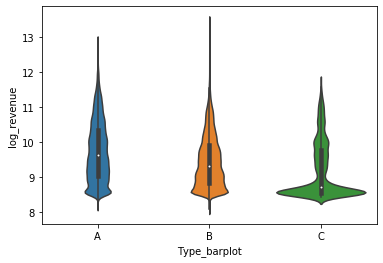

In [122]:
df_no_negative['Type_barplot'] = df_train['Type']
sns.violinplot(x='Type_barplot',y='log_revenue',data=df_no_negative)

Surprisingly, the highest weekly sales is generated by a type B store. Generally, though, the larger store type generated more sales on average, which is not surprising.

#### Size

I think that, as seen in the above section, larger stores tend to generate more sales, so there should be a linear relationship. Now I will confirm this.

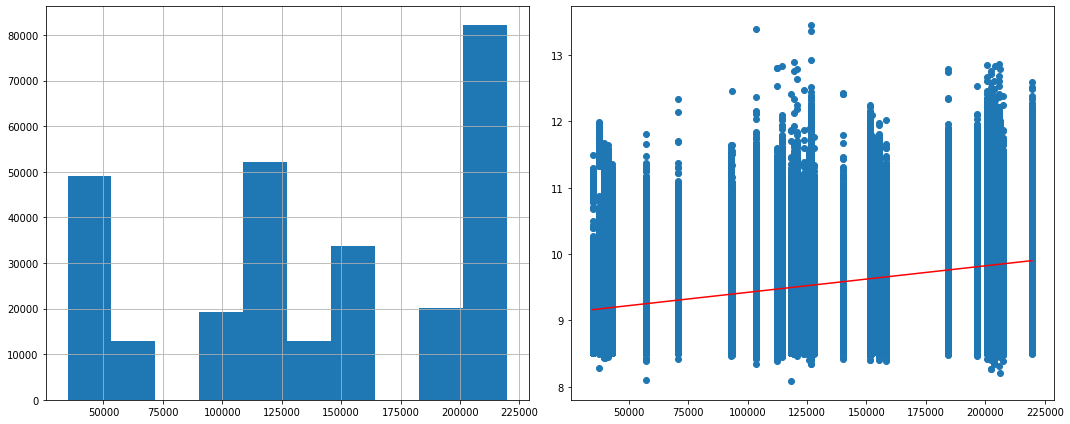

In [71]:
plotting('Size')

The scatter plot supports my hypothesis. 

#### Date

Now I'd like to look at the impact of date alone on the weekly sales. I'm going to group by each unique date, take the average weekly sale across all stores and departments, and plot them in a line plot. Each black line represents the first of a month.

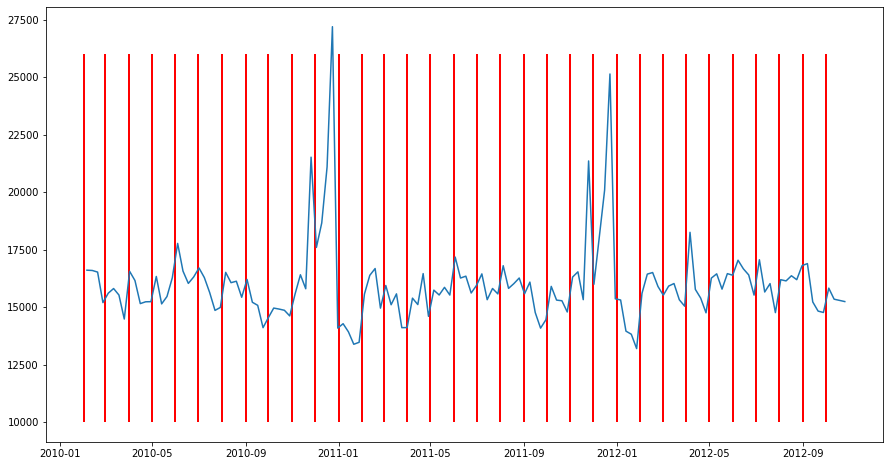

In [123]:
plt.figure(figsize=[15,8])
plt.plot(df_no_negative.groupby('Date').mean()['Weekly_Sales'])

dates = df_no_negative['Date'].astype('datetime64[M]')
plt.vlines(dates,10000,26000, color='r')
plt.show()

Judging from the above graph, it is obvious that weekly sales see a drastic increase near the end of November and December, most likely due to Thanksgiving and Christmas, respectively. From a cursive look, though, there doesn't seem to be a large difference between the different years included.

#### Store and Department number.

Lastly, I'm just going to see if there's any difference between departments and stores. I don't think there will be, but it's good to check.

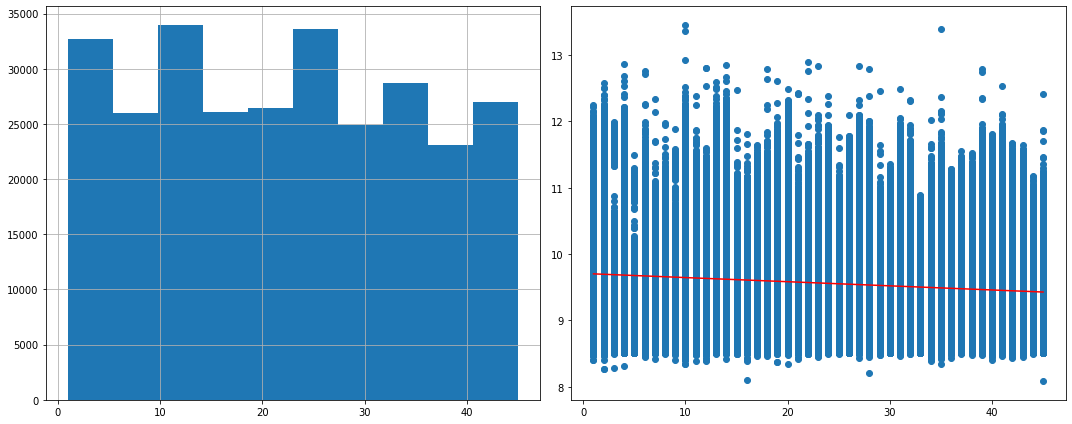

In [124]:
plotting('Store')

The distribution is mostly uniform. Surprisingly, there seems to be a slight negative correlation between store number and weekly sales.

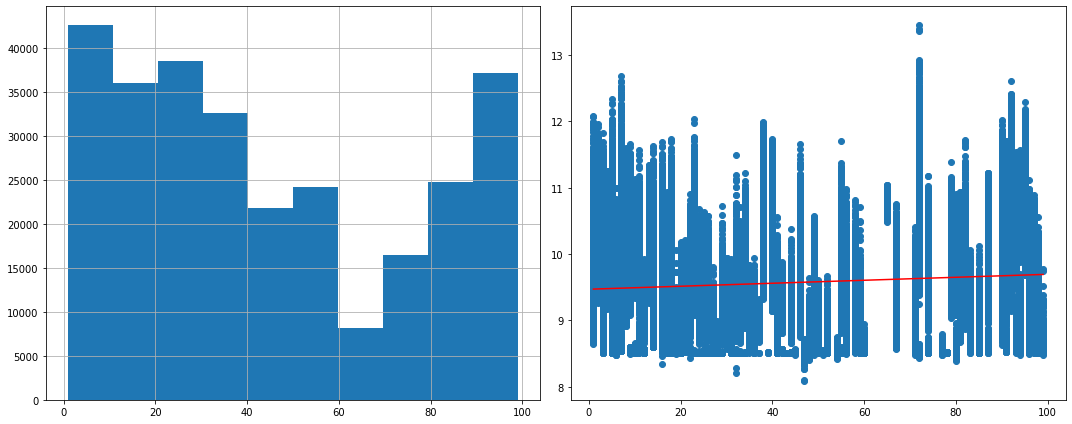

In [125]:
plotting('Dept')

Surprisingly, there appears to be a positive correlation between the department number and the weekly sales generated.

### Pairplot and Heatmap to visualize any other relationships

<Figure size 1080x1080 with 0 Axes>

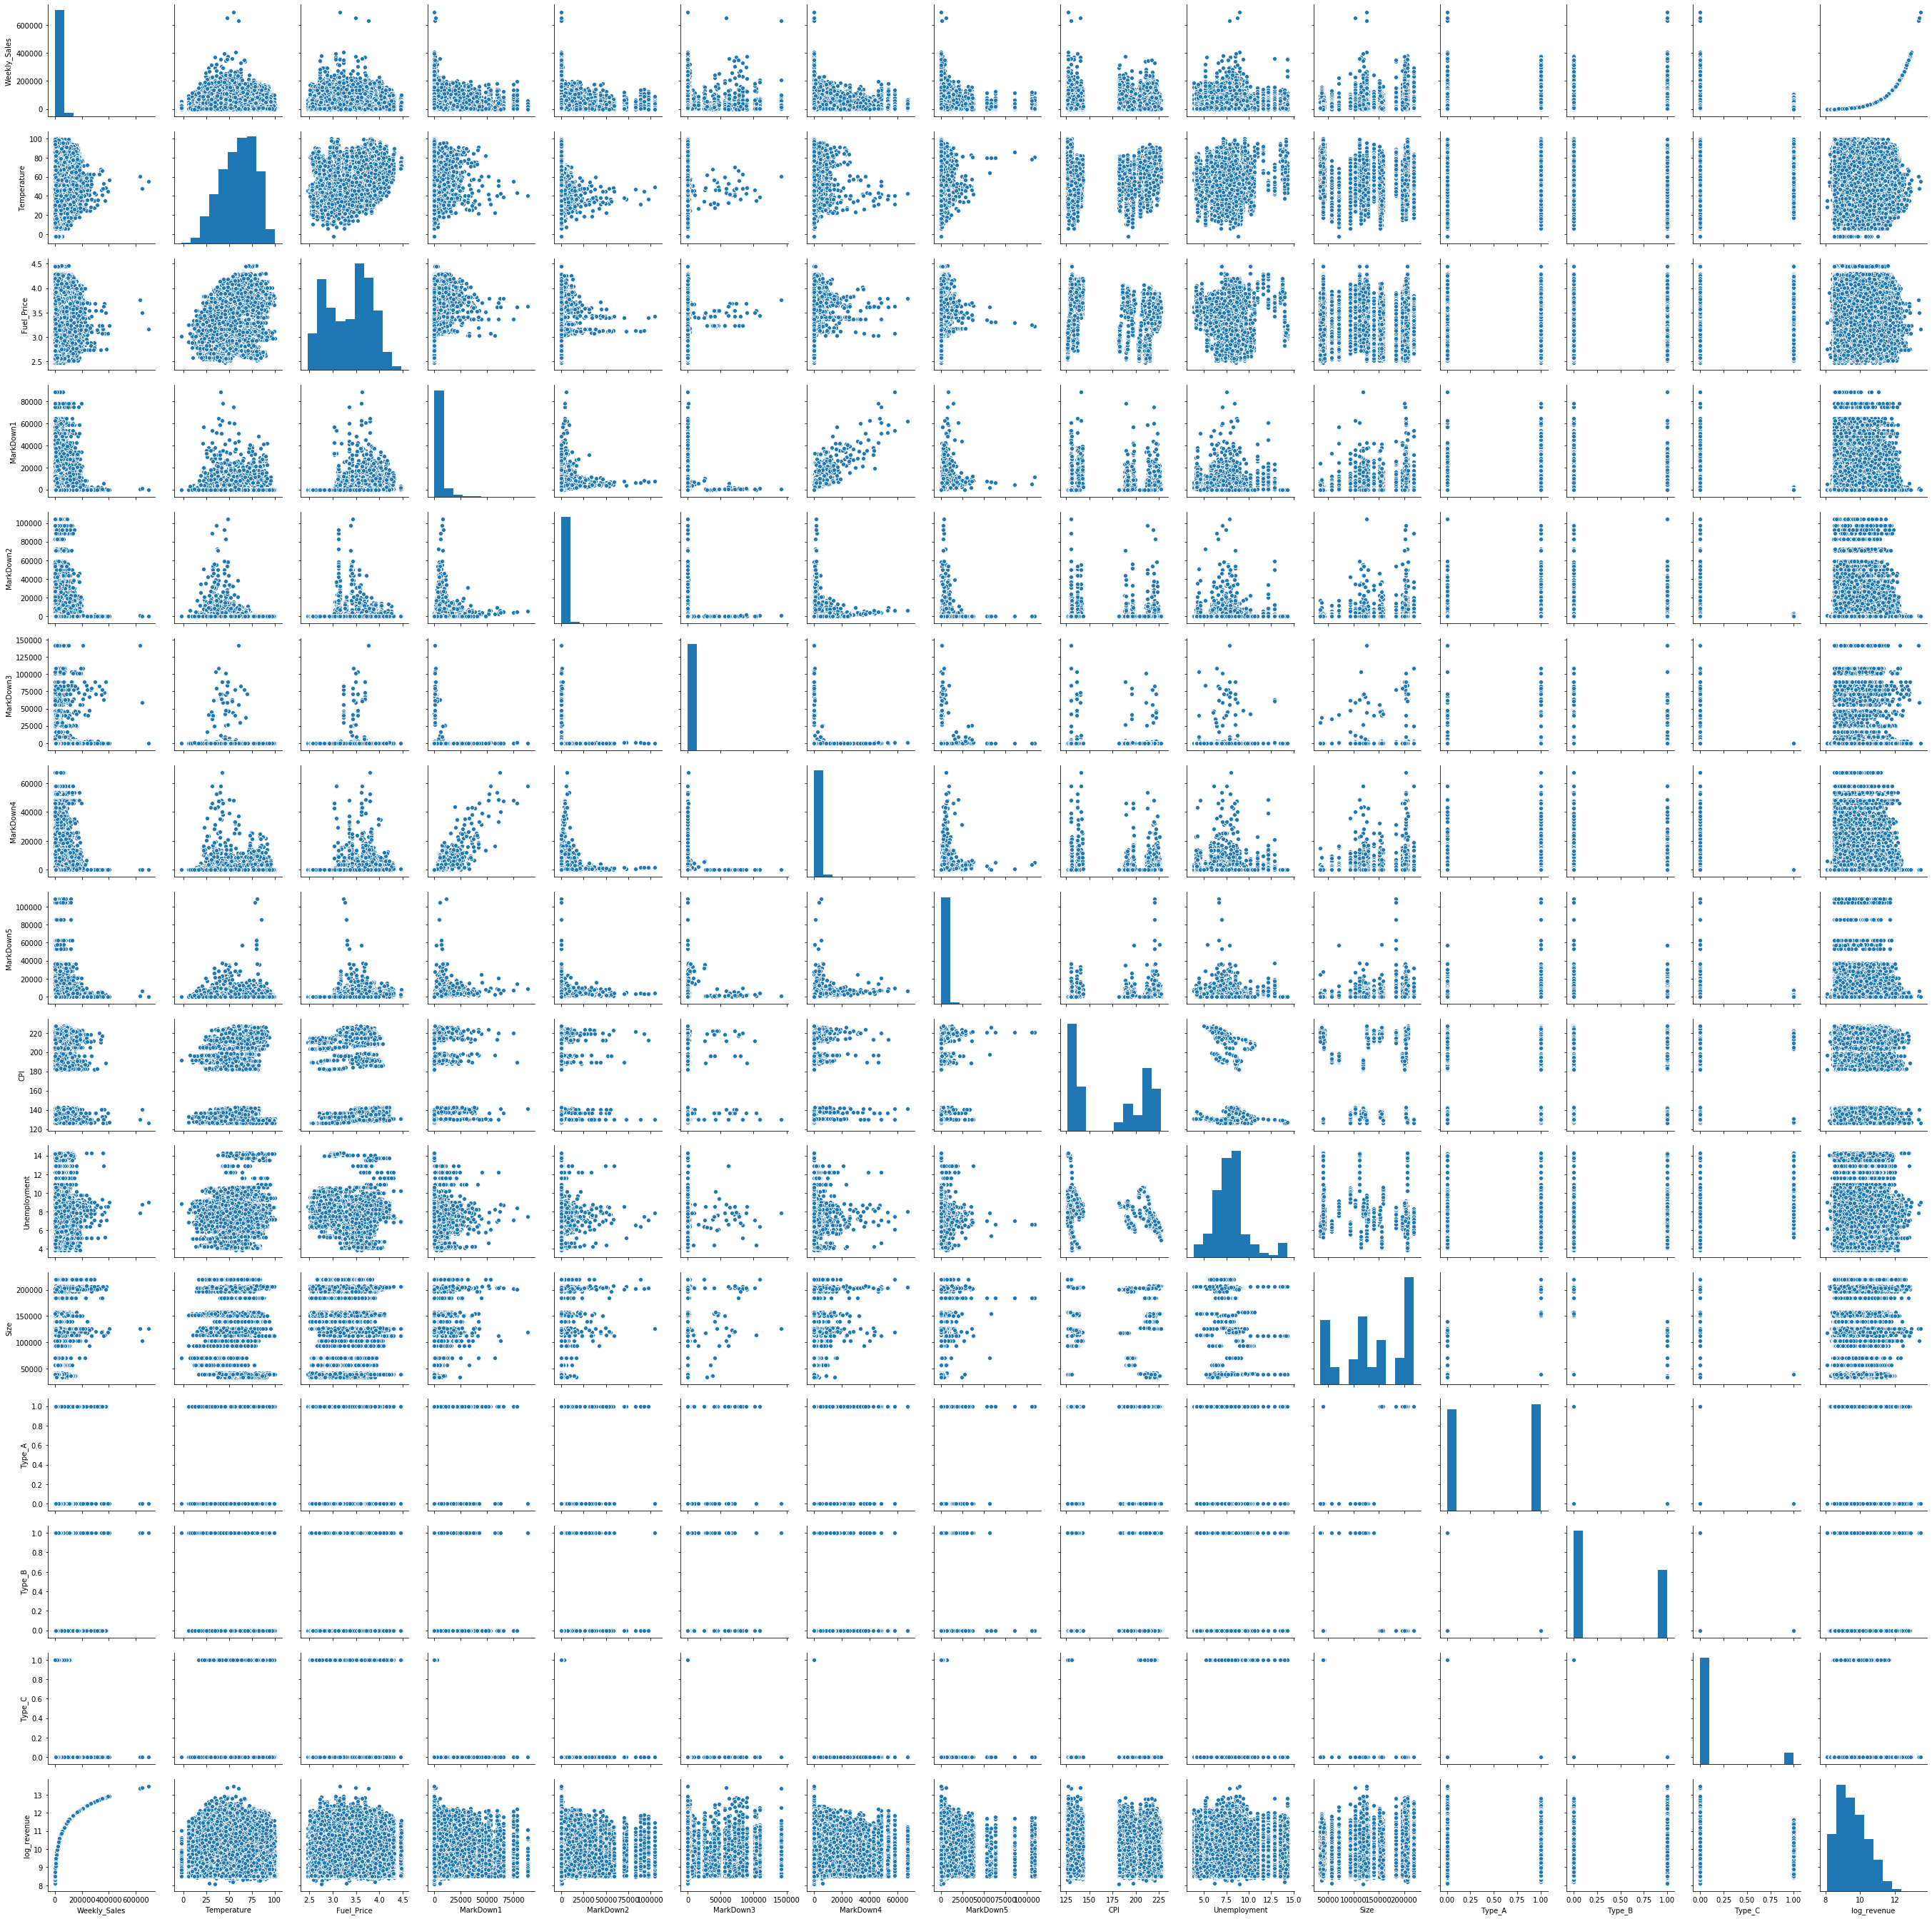

In [128]:
plt.figure(figsize=[15,15])
sns.pairplot(df_train_num)

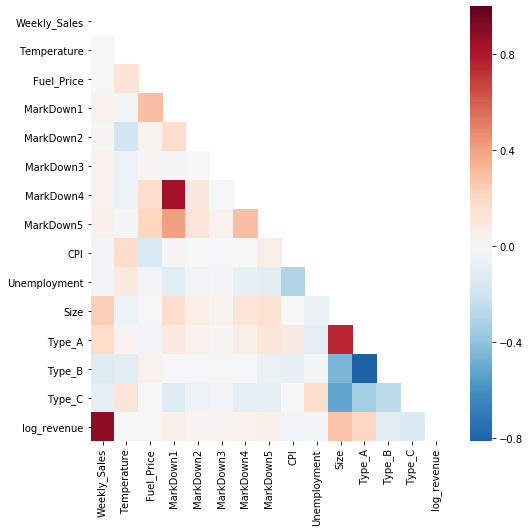

In [127]:
#Generating Correlation coefficients
df_train_num = df_no_negative.drop(['Store','Dept','IsHoliday','IsMarkDown','Date','log_revenue'],axis=1)
corr = df_train_num.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Create heatmap
plt.figure(figsize=[8,8])
sns.heatmap(corr,mask=mask,cmap='RdBu_r',center=0)

There are some correlation betweent the independent variables. Some of them make sense: For example, the markdown columns, especially MarkDown1, MarkDown4, and MarkDown5, are very positively correlated with each other. In this case, perhaps it'd be helpful to condense all of the markdown columns into one.

Some of the correlations, however, seem to make little sense, for example the negative correlation between MarkDown2 and Temperature. There is also a troubling lack of correlation between these numerical variables with the weekly sales. Both of these problems may be solved by standardization, or putting all of the variables on the same scale.

### Encoding into intermediate dataset

In [129]:
df_no_negative.to_csv(r'C:\Users\songs\Desktop\Springboard Files\Capstone 2\data\Interim\train1.csv')